## End to end predictor of whether someone survived or not  

1. **Problem definition:**  Given information about the passengers on the titanic spaceship how accurately can the model predict their survival 

2. **Data:**  The data is provided by [Kaggle](https://www.kaggle.com/competitions/spaceship-titanic/data)

3. **Evaluation:** The model will be evaluated on `accuracy`

4. **Features:**  
* `PassengerId`  A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is traveling with and `pp` is their number within the group. People in a group are often family members, but not always.

* `HomePlanet`  The planet the passenger departed from, typically their planet of permanent residence.

* `CryoSleep`  Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* `Cabin`  The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either `P` for Port or `S` for Starboard.

* `Destination`  The planet the passenger will be debarking to.

* `Age`  The age of the passenger.

* `VIP`  Whether the passenger has paid for special VIP service during the voyage.

* `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`  Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* `Name`  The first and last names of the passenger.

* `Transported`  Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## Data exploration 

In [2]:
titanic_df = pd.read_csv("train.csv")
titanic_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
titanic_df.shape

(8693, 14)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


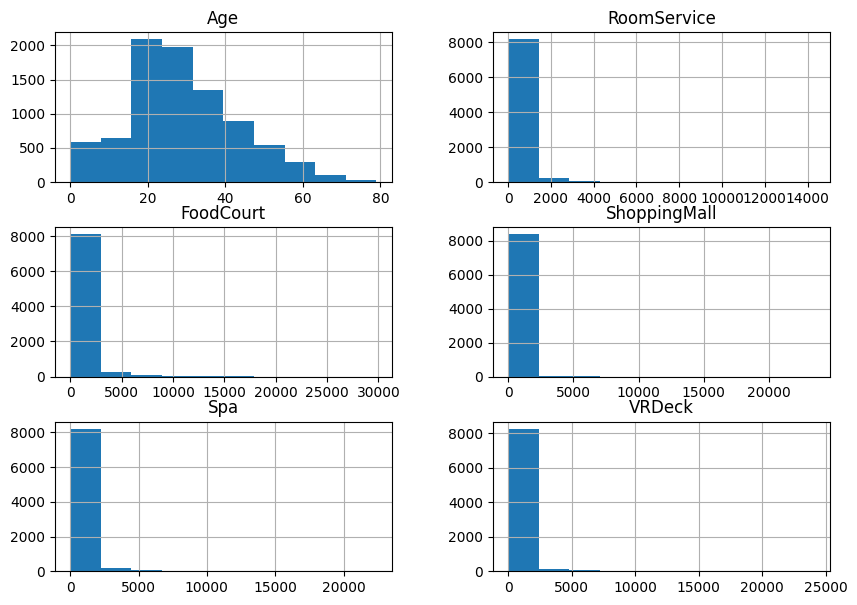

In [5]:
titanic_df.hist(figsize=(10,7));

In [6]:
titanic_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
titanic_df.isna().sum()/len(titanic_df)*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [8]:
titanic_df["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

Text(0, 0.5, 'Count')

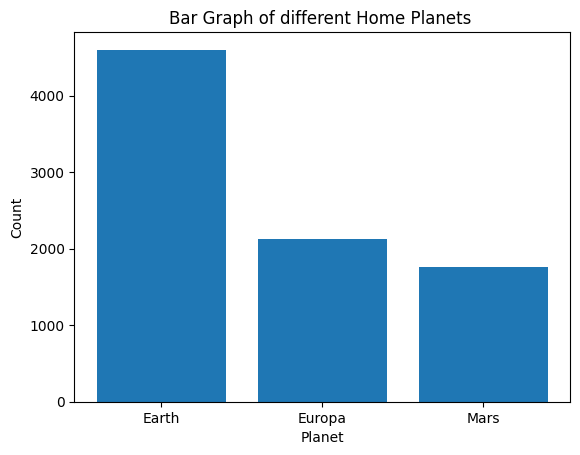

In [9]:
home_planet_value_counts = titanic_df["HomePlanet"].value_counts()
x = home_planet_value_counts.index
height = home_planet_value_counts.values

# Plot the bar graph
plt.bar(x, height)
plt.title("Bar Graph of different Home Planets ")
plt.xlabel("Planet")
plt.ylabel("Count")

In [10]:
titanic_df.shape

(8693, 14)

In [11]:
titanic_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [12]:
titanic_df["CryoSleep"].isna().sum()

217

In [13]:
titanic_df["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [14]:
titanic_df["Cabin"].isna().sum()

199

In [15]:
titanic_df["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [16]:
titanic_df["Destination"].isna().sum()

182

In [17]:
titanic_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

the `helper_functions` implements a function that returns either the number of unique values if 
the unique values are more than a cretin number or returns the unique values with their count also it returns 
the number of missing values  

In [18]:
titanic_df["VIP"].dtype=="object"

True

In [19]:
from helper_functions import get_value_counts_and_missing
cat_columns = []
cat_dict = []
for column in titanic_df.columns:
    if titanic_df[column].dtype =="object":
        cat_columns.append(column)
        count,missing = get_value_counts_and_missing(titanic_df,column,5)
        cat_dict.append([column,missing,isinstance(count,int)])
        print(f"{column}, \t {count}")
        print(f"number of missing values {missing}")

PassengerId, 	 8693
number of missing values 0
HomePlanet, 	 Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
number of missing values 201
CryoSleep, 	 False    5439
True     3037
Name: CryoSleep, dtype: int64
number of missing values 217
Cabin, 	 6561
number of missing values 199
Destination, 	 TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
number of missing values 182
VIP, 	 False    8291
True      199
Name: VIP, dtype: int64
number of missing values 203
Name, 	 8474
number of missing values 200


In [20]:
cat_dict

[['PassengerId', 0, True],
 ['HomePlanet', 201, False],
 ['CryoSleep', 217, False],
 ['Cabin', 199, True],
 ['Destination', 182, False],
 ['VIP', 203, False],
 ['Name', 200, True]]

In [21]:
categorical_info_pd = pd.DataFrame(cat_dict,columns=["column_name","missing_values","high_number_of_unique_values"])
categorical_info_pd

,column_name,missing_values,high_number_of_unique_values
0,PassengerId,0,True
1,HomePlanet,201,False
2,CryoSleep,217,False
3,Cabin,199,True
4,Destination,182,False
5,VIP,203,False
6,Name,200,True


In [22]:
df_shape = titanic_df.shape
df_shape

(8693, 14)

In [23]:
titanic_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


This is intended to check the number of rows that have missing values  1867 rows have one missing value 203 rows have 2 
missing values 17 rows have 3 missing values totaling in 2087 rows with missing values  

In [24]:
print(len(titanic_df[titanic_df.isna().sum(axis=1)==4]))
titanic_df[titanic_df.isna().sum(axis=1)>=1]


0


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [25]:
corr_matrix = titanic_df.corr(numeric_only=True)
corr_matrix["Transported"].sort_values(ascending=False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

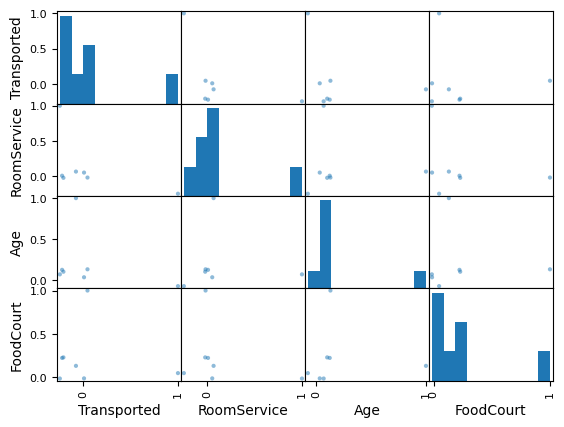

In [26]:
from pandas.plotting import scatter_matrix
attributes = ["Transported","RoomService","Age","FoodCourt"]
scatter_matrix(corr_matrix[attributes]);

In [27]:
titanic_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

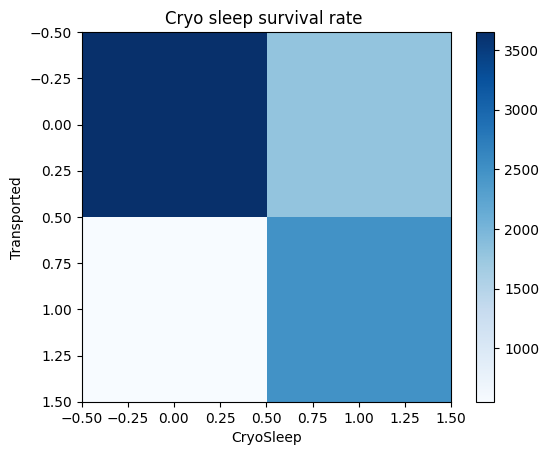

In [28]:
cm = pd.crosstab(titanic_df["CryoSleep"],titanic_df["Transported"])
plt.imshow(cm,cmap="Blues")
plt.title("Cryo sleep survival rate ")
plt.xlabel("CryoSleep")
plt.ylabel("Transported")
plt.colorbar();


In [29]:
titanic_df[titanic_df["CryoSleep"]==False]["Transported"].value_counts()

False    3650
True     1789
Name: Transported, dtype: int64

In [30]:
titanic_df[titanic_df["CryoSleep"]==True]["Transported"].value_counts()

True     2483
False     554
Name: Transported, dtype: int64

In [31]:
titanic_df[titanic_df["CryoSleep"].isna()]["Transported"].value_counts()

False    111
True     106
Name: Transported, dtype: int64

So we could assume that `CryoSleep` is a good indictor of survivorship if the passenger didn't use it  

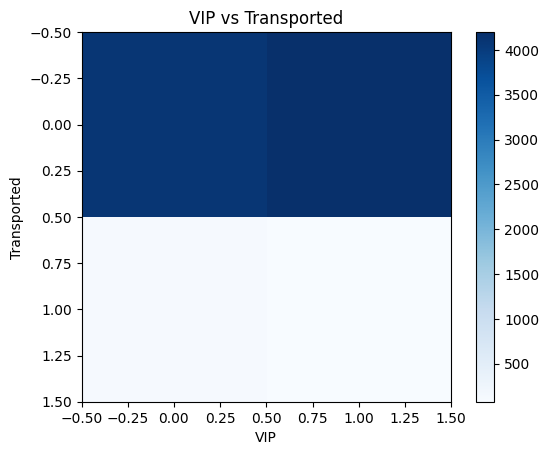

In [32]:
cm = pd.crosstab(titanic_df["VIP"],titanic_df["Transported"])
plt.imshow(cm,cmap="Blues")
plt.title("VIP vs Transported")
plt.xlabel("VIP")
plt.ylabel("Transported")
plt.colorbar();



So there is no actual correlation between VIP and survivorship

## Data Preparation (Preprocessing) 

Firstly the data is to be split into train and test sets then we fill the missing values using scikit-learn's transformers 

In [33]:
from sklearn.model_selection import train_test_split 
np.random.seed(42)
titanic_features = titanic_df.drop("Transported",axis=1)
titanic_labels = titanic_df["Transported"]
train_X,test_X,train_y,test_y  = train_test_split(titanic_features,titanic_labels,test_size=0.2)

In [34]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

class ExtractPassengerID(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X["PassengerId"].str.split('_').str[1].values.reshape(-1, 1)

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scalar", StandardScaler())
])

non_numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder())
])

numerical_columns = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
categorical_columns = ["HomePlanet", "Destination"]
boolean_columns = ["CryoSleep", "VIP"]
non_numerical_columns = ["Cabin", "Name"]
id_column = ["PassengerId"]

preprocessor = ColumnTransformer(
    transformers=[
        ('non_numerical', non_numerical_pipeline, non_numerical_columns),
        ('boolean', SimpleImputer(strategy='most_frequent'), boolean_columns),
        ('numerical', num_pipeline, numerical_columns),
        ('categorical', categorical_pipeline, categorical_columns),
        ('passenger_id', ExtractPassengerID(), id_column)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
transformed_data = pipeline.fit_transform(train_X)
transformed_test = pipeline.transform(test_X)


## Modelling 

Firstly We'll train a `LogisticRegression` model, an `SVM` model , a `DecisionTree` model and a `RandomForest` model 
using `RandomizedSearchCV` to find a good baseline model then we will use `GridSearchCV` to try to get the best model  

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump
logistic_regression_parameters = {
    'C': np.logspace(-4, 4, 10),
    'solver': ['lbfgs', 'liblinear']
}

svm_parameters = {
    'C': np.logspace(-2, 0, 5),
    'kernel': ['linear', 'rbf'],
    'gamma': np.logspace(-3, 1, 5)
}

decision_tree_parameters = {
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20)
}

random_forest_parameters = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20)
}


# Create a list of algorithms
algorithms = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]

# Create a list of parameters
parameters = [logistic_regression_parameters, svm_parameters, decision_tree_parameters, random_forest_parameters]

models_accuracy={}
model_test_accuracy = {}

# Create a RandomizedSearchCV object
logistic_regression_model = RandomizedSearchCV(algorithms[0], parameters[0], cv=5, n_iter=15, random_state=42,verbose=2)
# Fit the model to the data
logistic_regression_model.fit(transformed_data,train_y)
# save the best model 
dump(logistic_regression_model.best_estimator_,"logistic_regression_base.joblib")
models_accuracy["logistic_regression"]=logistic_regression_model.score(transformed_data,train_y)
model_test_accuracy["logistic_regression"] = logistic_regression_model.score(transformed_test,test_y)


# Print the best parameters
print(f"linear regression best params{logistic_regression_model.best_params_}")
# Create a RandomizedSearchCV object
SVM_model = RandomizedSearchCV(algorithms[1], parameters[1], cv=5, n_iter=5, random_state=42,verbose=2,refit=True)
# Fit the model to the data
SVM_model.fit(transformed_data,train_y)
dump(SVM_model.best_estimator_,"svm_base.joblib")
models_accuracy["SVM"]=SVM_model.score(transformed_data,train_y)
model_test_accuracy["SVM"] = SVM_model.score(transformed_test,test_y)

# Print the best parameters
print(f"SVM best params{SVM_model.best_params_}")

# Create a RandomizedSearchCV object
tree_model = RandomizedSearchCV(
    algorithms[2], parameters[2], cv=5, n_iter=15, random_state=42, verbose=2)
# Fit the model to the data
tree_model.fit(transformed_data, train_y)
dump(tree_model,"decision_tree_base.joblib")
models_accuracy["decision tree"] = tree_model.score(transformed_data, train_y)
model_test_accuracy["decision tree"] = tree_model.score(
    transformed_test, test_y)
# Print the best parameters
print(f"Decision tree best params{tree_model.best_params_}")

# Create a RandomizedSearchCV object
forest_model = RandomizedSearchCV(
    algorithms[3], parameters[3], cv=5, n_iter=15, random_state=42, verbose=2)
# Fit the model to the data
forest_model.fit(transformed_data, train_y)
dump(forest_model.best_estimator_,"random_forest_base.joblib")
models_accuracy["forest"] = forest_model.score(transformed_data, train_y)
model_test_accuracy["forest"] = forest_model.score(transformed_test, test_y)

# Print the best parameters
print(f"linear regression best params{forest_model.best_params_}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END .............C=1291.5496650148827, solver=liblinear; total time=   0.1s
[CV] END .............C=1291.5496650148827, solver=liblinear; total time=   0.0s
[CV] END .............C=1291.5496650148827, solver=liblinear; total time=   0.0s
[CV] END .............C=1291.5496650148827, solver=liblinear; total time=   0.0s
[CV] END .............C=1291.5496650148827, solver=liblinear; total time=   0.0s
[CV] END .............C=166.81005372000558, solver=liblinear; total time=   0.0s
[CV] END .............C=166.81005372000558, solv

C:\Users\Bustati\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................C=0.3593813663804626, solver=lbfgs; total time=   0.3s
[CV] END .................C=0.3593813663804626, solver=lbfgs; total time=   0.1s


C:\Users\Bustati\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................C=0.3593813663804626, solver=lbfgs; total time=   0.2s


C:\Users\Bustati\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................C=0.3593813663804626, solver=lbfgs; total time=   0.2s
[CV] END .................C=0.3593813663804626, solver=lbfgs; total time=   0.3s
[CV] END ...........C=0.005994842503189409, solver=liblinear; total time=   0.1s
[CV] END ...........C=0.005994842503189409, solver=liblinear; total time=   0.1s
[CV] END ...........C=0.005994842503189409, solver=liblinear; total time=   0.1s
[CV] END ...........C=0.005994842503189409, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.005994842503189409, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.782559402207126, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.782559402207126, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.782559402207126, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.782559402207126, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.782559402207126, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0007

C:\Users\Bustati\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.1s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.0s


C:\Users\Bustati\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.3s


C:\Users\Bustati\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.3s


C:\Users\Bustati\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................C=1291.5496650148827, solver=lbfgs; total time=   0.2s


C:\Users\Bustati\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................C=1291.5496650148827, solver=lbfgs; total time=   0.2s
[CV] END .................C=1291.5496650148827, solver=lbfgs; total time=   0.2s


C:\Users\Bustati\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................C=1291.5496650148827, solver=lbfgs; total time=   0.1s


C:\Users\Bustati\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................C=1291.5496650148827, solver=lbfgs; total time=   0.3s
[CV] END ..............C=21.54434690031882, solver=liblinear; total time=   0.1s
[CV] END ..............C=21.54434690031882, solver=liblinear; total time=   0.0s
[CV] END ..............C=21.54434690031882, solver=liblinear; total time=   0.0s
[CV] END ..............C=21.54434690031882, solver=liblinear; total time=   0.0s
[CV] END ..............C=21.54434690031882, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.000774263682681127, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.000774263682681127, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.000774263682681127, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.000774263682681127, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.000774263682681127, solver=lbfgs; total time=   0.0s
[CV] END .............C=0.3593813663804626, solver=liblinear; total time=   0.0s
[CV] END .............C=0.35

C:\Users\Bustati\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


linear regression best params{'solver': 'liblinear', 'C': 2.782559402207126}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......C=0.03162277660168379, gamma=0.01, kernel=rbf; total time=  10.7s
[CV] END ......C=0.03162277660168379, gamma=0.01, kernel=rbf; total time=   9.8s
[CV] END ......C=0.03162277660168379, gamma=0.01, kernel=rbf; total time=   9.7s
[CV] END ......C=0.03162277660168379, gamma=0.01, kernel=rbf; total time=  10.2s
[CV] END ......C=0.03162277660168379, gamma=0.01, kernel=rbf; total time=  11.7s
[CV] END ......C=0.31622776601683794, gamma=10.0, kernel=rbf; total time=  13.3s
[CV] END ......C=0.31622776601683794, gamma=10.0, kernel=rbf; total time=  10.8s
[CV] END ......C=0.31622776601683794, gamma=10.0, kernel=rbf; total time=  10.9s
[CV] END ......C=0.31622776601683794, gamma=10.0, kernel=rbf; total time=  10.4s
[CV] END ......C=0.31622776601683794, gamma=10.0, kernel=rbf; total time=  11.4s
[CV] END ..C=0.31622776601683794, gamma=0.001, kernel

In [39]:
models_accuracy

{'logistic_regression': 0.7909117054932413,
 'SVM': 0.7811331607707794,
 'decision tree': 0.8248490077653149,
 'forest': 0.8399482312338222}

In [40]:
model_test_accuracy

{'logistic_regression': 0.7763082231167338,
 'linear_regression': 0.7607820586543991,
 'decision tree': 0.7659574468085106,
 'forest': 0.7883841288096607}

In [45]:
from sklearn.metrics import classification_report
models = [logistic_regression_model.best_estimator_,SVM_model.best_estimator_,tree_model.best_estimator_,forest_model.best_estimator_]
for model in models:
    print(f"____{model}____")
    print(classification_report(test_y,model.predict(transformed_test)))
    print("________________")

____LogisticRegression(C=2.782559402207126, solver='liblinear')____
              precision    recall  f1-score   support

       False       0.79      0.74      0.77       861
        True       0.76      0.81      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

________________
____SVC(C=0.31622776601683794, gamma=0.001, kernel='linear')____


              precision    recall  f1-score   support

       False       0.75      0.77      0.76       861
        True       0.77      0.75      0.76       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739

________________
____DecisionTreeClassifier(max_depth=13, min_samples_leaf=18, min_samples_split=18)____
              precision    recall  f1-score   support

       False       0.80      0.70      0.75       861
        True       0.74      0.83      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.76      1739
weighted avg       0.77      0.77      0.76      1739

________________
____RandomForestClassifier(max_depth=15, min_samples_leaf=11, min_samples_split=4,
                       n_estimators=30)____
              precision    recall  f1-score   support

       False       0.82      0.74      0.7

In [65]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns 
predictions=[]
predictions_proba=[]
models_proba = [logistic_regression_model.best_estimator_,tree_model.best_estimator_,forest_model.best_estimator_]
models_name= ["Logistic Regression","Decision Tree","Random Forest"]

for model in models_proba :
    predictions.append(model.predict(transformed_test))
    predictions_proba.append(model.predict_proba(transformed_test)[:,1])



num_models = len(models_proba)
num_cols = 2  # Two plots per model: confusion matrix and ROC curve
num_rows = (num_models + num_cols - 1) // num_cols
fig, axes = plt.subplots(3, 2, figsize=(12, 6*num_rows))


for i, (model,name,prediction,prediction_proba) in enumerate(zip(models_proba,models_name,predictions,predictions_proba)):

    ax_confusion = axes[i, 0]
    ax_roc = axes[i, 1]

    # Plot Confusion Matrix
    sns.heatmap(confusion_matrix(test_y, prediction), annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=["negative", "positive"], yticklabels=["negative", "positive"], ax=ax_confusion)
    ax_confusion.set_title(f'{name} - Confusion Matrix')

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(test_y, prediction_proba)
    roc_auc = roc_auc_score(test_y, prediction_proba)
    ax_roc.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    ax_roc.plot([0, 1], [0, 1], 'k--')
    ax_roc.set_xlim([0.0, 1.0])
    ax_roc.set_ylim([0.0, 1.05])
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title(f'{name} - ROC Curve')
    ax_roc.legend(loc="lower right")

# Adjust the layout and spacing of the subplots
plt.tight_layout()

# Show the plots
plt.show()



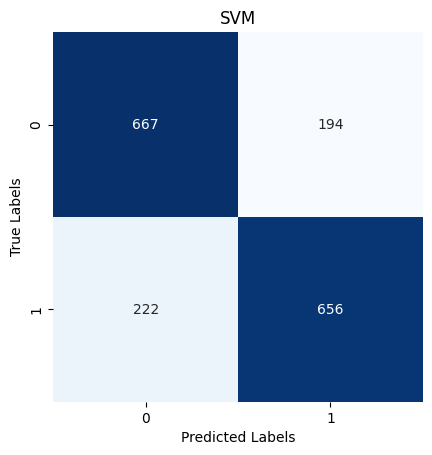

In [86]:
# since SVM had probability =False in the hyperparameter its ROC curve can't be drawn 
svm_predations = SVM_model.predict(transformed_test)
plot_confusion_matrix(test_y,svm_predations,title="SVM")

After inspecting the above values it's clear that the `RandomForestClassifier` is the best fit for the data so we will finitune it to get higher accuracy

In [88]:
forest_model.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=11, min_samples_split=4,
                       n_estimators=30)

In [90]:
np.arange(10,21,5)

array([10, 15, 20])

In [108]:
transformed_data.shape

(6954, 17)

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from joblib import dump
random_forest_fine_tuned = RandomForestClassifier()
param_grid = {
    "criterion":["gini", "entropy", "log_loss"],
    "n_estimators":[15,20,25,30],
    "max_depth":np.arange(10,51,5),
    "min_samples_split":np.arange(2,11,1),
    "min_samples_leaf":np.arange(10,21,1),
    "max_features": ["log2", "sqrt",None],
    "bootstrap": [True, False]
}
grid_search = GridSearchCV(random_forest_fine_tuned,param_grid,cv=3,
                                n_jobs=-1,verbose=2,refit=True)
grid_search.fit(transformed_data,train_y)


Fitting 3 folds for each of 64152 candidates, totalling 192456 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([10, 15, 20, 25, 30, 35, 40, 45, 50]),
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': [15, 20, 25, 30]},
             verbose=2)

In [116]:
grid_search.best_estimator_.score(transformed_test,test_y)

0.7814836112708453

In [117]:
forest_model.score(transformed_test,test_y)

0.7883841288096607

In [118]:
forest_model.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=11, min_samples_split=4,
                       n_estimators=30)

In [121]:
grid_search.best_estimator_.score(transformed_data,train_y)

0.8382226056945643

In [122]:
dump(grid_search.best_estimator_,"fine_tuned_random_forest.joblib")

['fine_tuned_random_forest.joblib']

In [123]:
submission_data  = pd.read_csv("test.csv")
submission_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [124]:
submission_data.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [128]:
submission_transformed = pipeline.transform(submission_data)
predicted_labels = grid_search.predict(submission_transformed)
data_dict = {
    "PassengerId":submission_data["PassengerId"],
    "Transported":predicted_labels
}
submission = pd.DataFrame(data_dict)

In [129]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [130]:
submission.to_csv("first_submission.csv",index=False)

The above model gave an accuracy score of 79% on the test data giving an average ranking 
the model's hyperparameters were : 
* `bootstrap` : True
* `ccp_alpha`: 0.0
* `class_weight` : None
* `criterion` : `log_loss`
* `max_depth`: 30
* `max_features` : `log2`
* `max_leaf_nodes`: None
* `max_samples`: None
* `min_impurity_decrease`: 0.0
* `min_samples_leaf`: 14
* `min_samples_split`: 3
* `min_weight_fraction_leaf`: 0.0
* `n_estimators`: 25

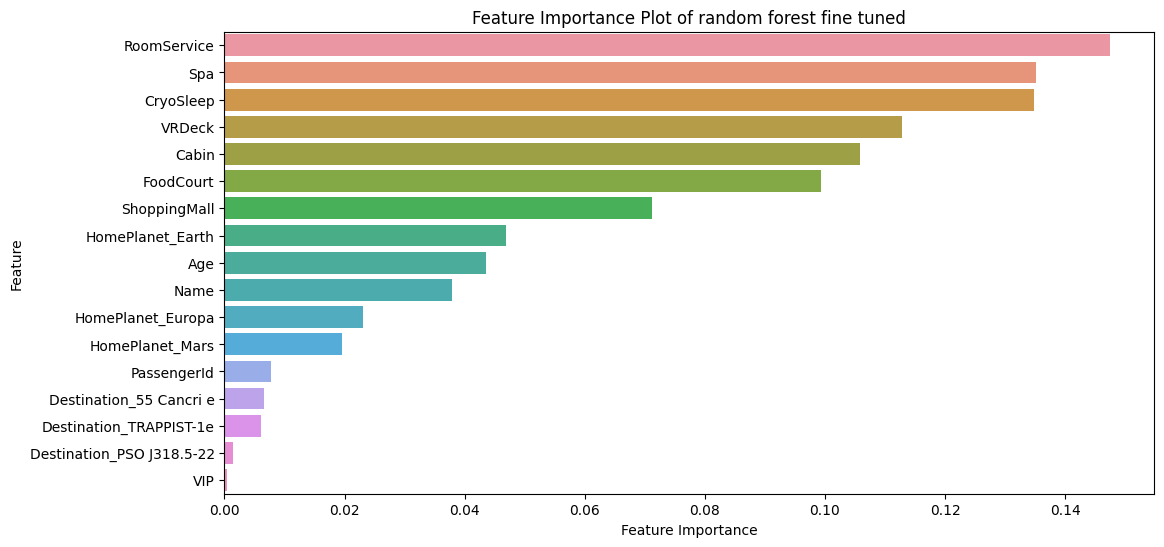

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load 

model = load("fine_tuned_random_forest.joblib")

# Get the OneHotEncoder object from the categorical_pipeline
one_hot_encoder = pipeline.named_steps['preprocessor'].named_transformers_["categorical"].named_steps["encode"]

# Get the feature names after one-hot encoding
feature_names_after_encoding = one_hot_encoder.get_feature_names_out(input_features=categorical_columns)


# Assuming you have already extracted the feature importances and stored them in 'feature_importances'
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_names = non_numerical_columns +  boolean_columns + numerical_columns +list(feature_names_after_encoding)+ id_column
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot of random forest fine tuned')
plt.show()


In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_classifier = XGBClassifier() 
params = {
    "booster": ["gbtree", "gblinear"],
    "max_depth": np.arange(3, 11),
    "gamma": np.logspace(-5, 0, 10),
    "max_delta_step": np.logspace(-5, 0, 10)
}

random_xgb = RandomizedSearchCV(xgb_classifier,params,cv=5,n_iter=20,n_jobs=-1,verbose=2,refit=True)
random_xgb.fit(transformed_data,train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'gamma': array([1.00000000e-05, 3.59381366e-05, 1.29154967e-04, 4.64158883e-04,
       1.66810054e-03, 5.99484250e-03, 2.15443469e-02, 7.74263683e-02,
       2.78255940e-01, 1.00000000e+00]),
                                        'max_delta_step': array([1.00000000e-05, 3.59381366e-05, 1.29154967e-04, 4.64158883e-04,
       1.66810054e-03, 5.99484250e-03, 2.15443469e-02, 7.74263683e-02,
       2.78255940e-01, 1.00000000e+00]),
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
                   verbose=2)

In [39]:
random_xgb.best_estimator_.score(transformed_test,test_y)

0.7814836112708453

In [40]:
from sklearn.metrics import classification_report
print(classification_report(test_y,random_xgb.best_estimator_.predict(transformed_test)))

              precision    recall  f1-score   support

       False       0.80      0.75      0.77       861
        True       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [41]:
random_xgb.best_estimator_.score(transformed_data,train_y)

0.8201035375323554

In [42]:
random_xgb.best_estimator_

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1e-05, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0.2782559402207126, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

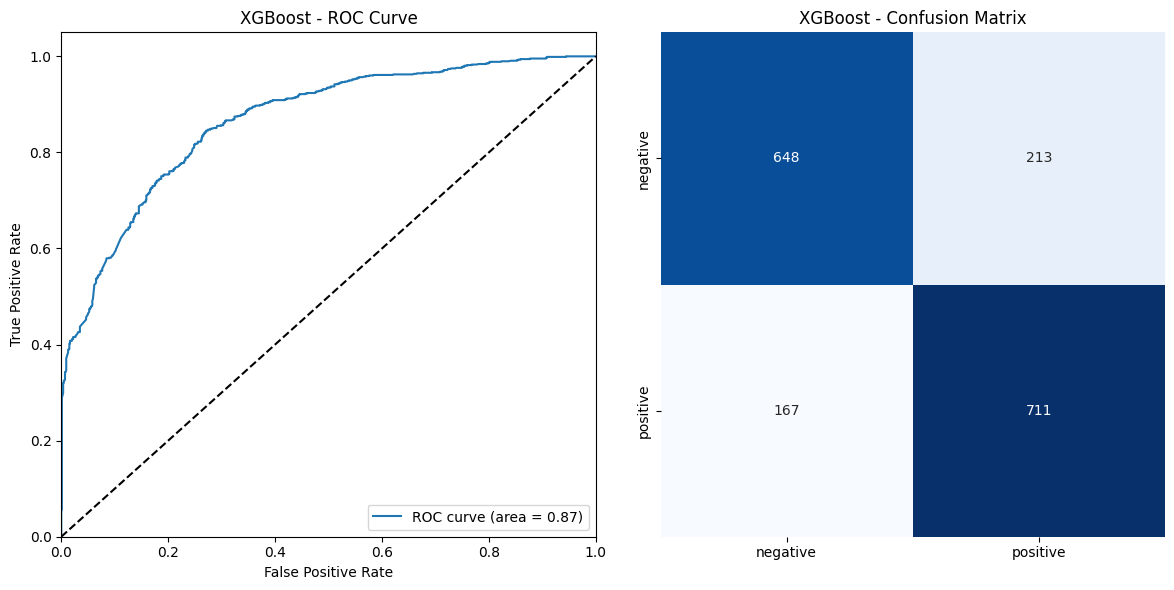

In [49]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns 

fig,ax = plt.subplots(1,2,figsize=(12,6))
prediction = random_xgb.best_estimator_.predict(transformed_test)

ax_confusion=ax[1]
sns.heatmap(confusion_matrix(test_y, prediction), annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=["negative", "positive"], yticklabels=["negative", "positive"], ax=ax_confusion)
ax_confusion.set_title('XGBoost - Confusion Matrix')

prediction_proba = random_xgb.best_estimator_.predict_proba(transformed_test)[:,1]
ax_roc=ax[0]
# Plot ROC Curve
fpr, tpr, _ = roc_curve(test_y, prediction_proba)
roc_auc = roc_auc_score(test_y, prediction_proba)
ax_roc.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax_roc.plot([0, 1], [0, 1], 'k--')
ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('XGBoost - ROC Curve')
ax_roc.legend(loc="lower right")

# Adjust the layout and spacing of the subplots
plt.tight_layout()

# Show the plots
plt.show()



It's giving a close result to `RandomForestClassifier` so it will not be finetuned 

**Next idea:** Neural networks 

In [35]:
transformed_data.shape

(6954, 17)

In [148]:
import tensorflow as tf 

nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(28,input_dim=17,activation="relu"),
    tf.keras.layers.Dense(18,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="nn_model/",
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    mode="max",
    verbose=1
)


nn_model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=opt, metrics=['accuracy'])

transformed_data_tensor = tf.convert_to_tensor(transformed_data,dtype=tf.float32)
train_y_tensor = tf.convert_to_tensor(train_y)
transformed_test_tensor = tf.convert_to_tensor(transformed_test,dtype=tf.float32)

history=nn_model.fit(x=transformed_data_tensor,y=train_y_tensor,batch_size=32,epochs=100,
                    validation_data=(transformed_test_tensor,test_y),callbacks=[checkpoint_callback])

Epoch 1/100


216/218 [============================>.] - ETA: 0s - loss: 9.3322 - accuracy: 0.5065
Epoch 1: val_accuracy improved from -inf to 0.50489, saving model to nn_model\
218/218 [==============================] - 4s 6ms/step - loss: 9.2800 - accuracy: 0.5066 - val_loss: 0.6946 - val_accuracy: 0.5049
Epoch 2/100
205/218 [===========================>..] - ETA: 0s - loss: 0.6942 - accuracy: 0.5091
Epoch 2: val_accuracy did not improve from 0.50489
218/218 [==============================] - 1s 4ms/step - loss: 0.6939 - accuracy: 0.5116 - val_loss: 0.7007 - val_accuracy: 0.5049
Epoch 3/100
212/218 [============================>.] - ETA: 0s - loss: 0.6960 - accuracy: 0.4944
Epoch 3: val_accuracy did not improve from 0.50489
218/218 [==============================] - 2s 7ms/step - loss: 0.6961 - accuracy: 0.4950 - val_loss: 0.7037 - val_accuracy: 0.5049
Epoch 4/100
216/218 [============================>.] - ETA: 0s - loss: 0.6958 - accuracy: 0.4933
Epoch 4: val_accuracy did not improve from 0.50489

KeyboardInterrupt: 

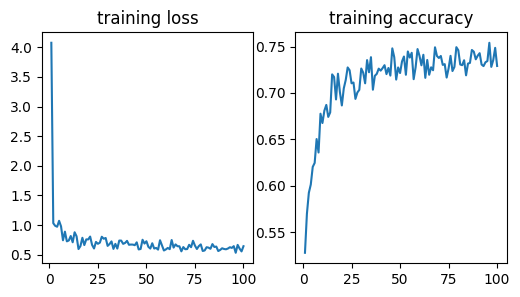

In [139]:
fig,ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(range(1,101),history.history["loss"])
ax[0].set_title("training loss")
ax[1].plot(range(1,101),history.history["accuracy"])
ax[1].set_title("training accuracy");

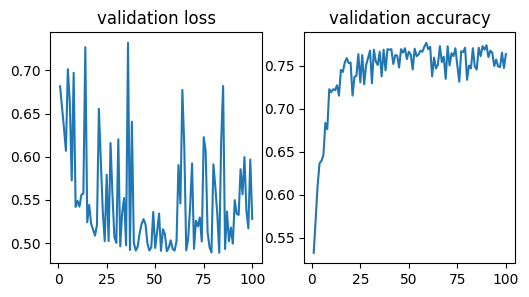

In [140]:
fig,ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(range(1,101),history.history["val_loss"])
ax[0].set_title("validation loss")
ax[1].plot(range(1,101),history.history["val_accuracy"])
ax[1].set_title("validation accuracy");

In [144]:
max(history.history["val_accuracy"])

0.7722828984260559